# Cuaderno 1

In [1]:
#cargar datos desde drive acceso libre
FILEID = "1QuZFHzpqtk_cqENZWI6Ec62Oqb0xJZBu"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-11-15 18:53:23--  https://docs.google.com/uc?export=download&confirm=&id=1QuZFHzpqtk_cqENZWI6Ec62Oqb0xJZBu
Resolving docs.google.com (docs.google.com)... 172.217.204.113, 172.217.204.139, 172.217.204.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/jkojki00v9j8tu73epp27tlrri9p8sc6/c380e13776l2t4ifrhdrhlugtiimdct7/1605466350000/05832326107551052745/08641529242443642100Z/1QuZFHzpqtk_cqENZWI6Ec62Oqb0xJZBu?e=download [following]
--2020-11-15 18:53:23--  https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/jkojki00v9j8tu73epp27tlrri9p8sc6/c380e13776l2t4ifrhdrhlugtiimdct7/1605466350000/05832326107551052745/08641529242443642100Z/1QuZFHzpqtk_cqENZWI6Ec62Oqb0xJZBu?e=download
Resolving doc-0c-ag-docs.googleusercontent.com (doc-0c-ag-docs.googleusercontent.com)... 74.125.31.132, 2607:f8b0:400c:c02::84
Connecting 

In [2]:
#Paso 1: Lectura

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline


%matplotlib inline
csv_path = '2017-18_NBA_salary.csv'

Xdata = pd.read_csv(csv_path)
col_drop = ['Player']
Xdata.drop(columns= col_drop, inplace=True)
Xdata.head()

,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,815615,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,12307692,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,3202217,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,3057240,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


In [3]:
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Salary           485 non-null    int64  
 1   NBA_Country      485 non-null    object 
 2   NBA_DraftNumber  485 non-null    int64  
 3   Age              485 non-null    int64  
 4   Tm               485 non-null    object 
 5   G                485 non-null    int64  
 6   MP               485 non-null    int64  
 7   PER              485 non-null    float64
 8   TS%              483 non-null    float64
 9   3PAr             483 non-null    float64
 10  FTr              483 non-null    float64
 11  ORB%             485 non-null    float64
 12  DRB%             485 non-null    float64
 13  TRB%             485 non-null    float64
 14  AST%             485 non-null    float64
 15  STL%             485 non-null    float64
 16  BLK%             485 non-null    float64
 17  TOV%            

In [4]:
#Paso 2: Particion entrenamiento y validacion
#Tamaño Xtrain 70%, Tamaño Xtest 30%

Xtrain, Xtest = train_test_split(Xdata,test_size=0.3)
col_sal = "Salary"
ytrain = Xtrain[col_sal]
ytest = Xtest[col_sal]
Xtrain.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
ytrain = imputer.fit_transform(pd.DataFrame(ytrain))
ytrain = ytrain.reshape(-1)

ytest = imputer.transform(pd.DataFrame(ytest))
ytest = ytest.reshape(-1)

print(ytrain.shape, ytest.shape)

(339,) (146,)


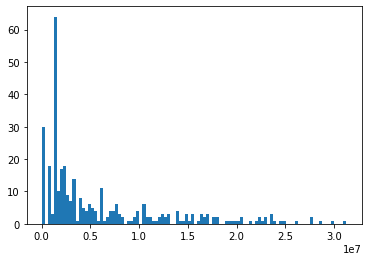

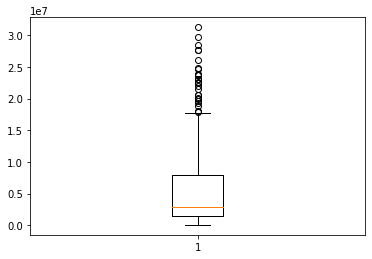

In [6]:
import matplotlib.pyplot as plt
plt.hist(ytrain,bins = 100)
plt.show()

plt.boxplot(ytrain)
plt.show()

In [ ]:
cat = ['NBA_Country','Tm']
items = [] 
for i in cat:
    items += [list(Xdata[i].value_counts().index)]
cat_usr = dict(zip(cat, items))

In [ ]:
Xdata[cat[1]].value_counts()

TOT    55
DAL    18
UTA    17
MEM    17
ATL    16
IND    16
GSW    16
PHI    16
BOS    15
LAL    15
SAS    15
MIL    15
MIA    15
ORL    15
DET    14
PHO    14
CHI    14
NYK    14
DEN    14
NOP    14
CHO    14
OKC    14
POR    14
WAS    13
MIN    13
HOU    13
TOR    13
LAC    12
SAC    12
BRK    12
CLE    10
Name: Tm, dtype: int64

# Crear clase propia

In [ ]:
#%% nba transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

class nba_sal(BaseEstimator,TransformerMixin):
    #inicializacion de clase y varaibles
    def __init__(self, cat_usr): #constructor clase
        self.cat_usr = cat_usr #lista de atributos categoricos

    def fit(self,X, *_):
        Xi = X.copy() #copiar dataset para no reemplazar original
        self.imputer_num = SimpleImputer(strategy="most_frequent") #crear imputador tipo modo
        self.a = Xi.columns[np.sum(Xi.isna())> 0] #encontrar columnas con datos faltantes
        #print(a)
        self.imputer_num.fit(Xi[self.a]) # ajustar imputador
        
        Xi[self.a] = self.imputer_num.transform(Xi[self.a]) #evaluar  sobre datos imputador
             
        
        cat = [] #codificar variables categoricas con ordinal encoder
        for i in self.cat_usr.keys():
            cat = cat + [[*self.cat_usr.get(i)]]
        self.col_cat_usr = OrdinalEncoder(categories=cat) # OneHotEncoder(categories=cat,sparse=False)
        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.fit_transform(Xi[[*self.cat_usr.keys()]])
        
        #self.col_cat = Xi.columns[Xi.dtypes=='O']
        #self.cod = OrdinalEncoder()
        #self.cod.fit(Xi[self.col_cat])
        
        return self    

    def transform(self, X, *_):#funcion transformador-> pensando datos nuevos
        Xi = X.copy()
        Xi[self.a] = self.imputer_num.transform(Xi[self.a])
        
        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.transform(Xi[[*self.cat_usr.keys()]])
        #Xi[self.col_cat]= self.cod.transform(Xi[self.col_cat])
        return Xi
    
    def fit_transform(self,X,*_):
        self.fit(X)
        return self.transform(X)

In [ ]:
nba = nba_sal(cat_usr=cat_usr)
Xtrain_pre = nba.fit_transform(Xtrain)

In [ ]:
Xtest_pre = nba.transform(Xtest)

In [ ]:
corr_matrix = Xtrain_pre.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
NBA_Country,1.000000,0.030076,-0.043896,0.058325,0.096425,0.013136,0.003074,0.012283,-0.095193,-0.026218,0.099447,0.222291,0.204346,-0.098760,-0.060594,0.097046,0.057954,-0.048862,0.050171,0.075582,0.063581,0.010317,-0.058815,0.068202,-0.015775,0.015283
NBA_DraftNumber,0.030076,1.000000,-0.021749,-0.160750,-0.279424,-0.326962,-0.329000,-0.187763,0.200728,0.058321,-0.032876,-0.163355,-0.129515,-0.128419,-0.039711,-0.128155,0.154455,-0.175094,-0.271259,-0.321737,-0.312021,-0.262353,-0.280966,-0.197835,-0.303454,-0.241546
Age,-0.043896,-0.021749,1.000000,0.034573,0.094153,0.113751,0.036836,0.077894,0.069871,-0.035989,-0.072255,-0.053074,-0.071602,0.118444,-0.051575,-0.081685,0.067050,-0.006986,0.123158,0.089448,0.120854,0.055224,0.098618,-0.032879,0.062340,0.098226
Tm,0.058325,-0.160750,0.034573,1.000000,0.199449,0.189441,0.050735,0.094063,-0.013378,-0.013615,-0.023643,0.012595,-0.004966,0.043744,-0.000939,0.001294,0.013437,0.010738,0.189931,0.106468,0.175441,0.055050,0.102014,0.046760,0.100628,0.163015
G,0.096425,-0.279424,0.094153,0.199449,1.000000,0.876025,0.384436,0.381042,0.003569,-0.083398,-0.102474,0.161495,0.062620,0.207878,0.019261,0.052439,-0.150875,0.069683,0.521861,0.729608,0.639744,0.380811,0.481997,0.363808,0.532023,0.400059
MP,0.013136,-0.326962,0.113751,0.189441,0.876025,1.000000,0.412269,0.315740,0.049971,-0.059315,-0.167286,0.092187,-0.016734,0.333646,0.045803,-0.037417,-0.133598,0.258394,0.683675,0.827305,0.791070,0.333688,0.516327,0.270576,0.518445,0.602580
PER,0.003074,-0.329000,0.036836,0.050735,0.384436,0.412269,1.000000,0.728437,-0.249090,0.161263,0.154674,0.347183,0.316379,0.381589,0.165905,0.362878,-0.108061,0.311868,0.542527,0.462887,0.556727,0.895141,0.868301,0.405805,0.849063,0.490591
TS%,0.012283,-0.187763,0.077894,0.094063,0.381042,0.315740,0.728437,1.000000,-0.083820,0.227290,0.069534,0.161513,0.148305,0.131483,-0.061573,0.223849,0.082070,0.099039,0.342792,0.302039,0.355264,0.739930,0.731638,0.202525,0.655501,0.255059
3PAr,-0.095193,0.200728,0.069871,-0.013378,0.003569,0.049971,-0.249090,-0.083820,1.000000,-0.215576,-0.530859,-0.346832,-0.497652,-0.031426,-0.026229,-0.416441,-0.237699,-0.087725,-0.066425,-0.105113,-0.085411,-0.119152,0.112930,-0.311206,-0.047166,-0.052224
FTr,-0.026218,0.058321,-0.035989,-0.013615,-0.083398,-0.059315,0.161263,0.227290,-0.215576,1.000000,0.078676,0.163502,0.152490,0.016149,-0.116619,0.076185,0.183316,0.029270,0.059674,0.001665,0.044501,0.197586,0.080023,0.004163,0.064154,0.062074


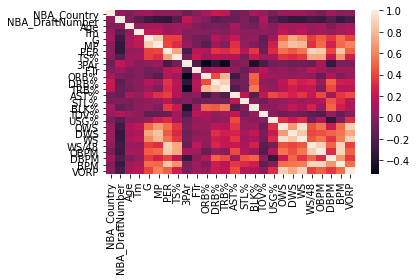

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
#plt.savefig('results/corr_matrix.pdf', format='pdf', dpi=300)
plt.show()

In [ ]:
Xtrain_pre2 = Xtrain_pre.copy()
Xtrain_pre2['Salida'] = ytrain
corr_matrix = abs(Xtrain_pre2.corr())
corr_matrix['Salida'].sort_values(ascending=False)

Salida             1.000000
WS                 0.588715
OWS                0.563471
VORP               0.559841
DWS                0.506622
MP                 0.506491
NBA_DraftNumber    0.375730
Age                0.355678
OBPM               0.348111
PER                0.340145
BPM                0.328504
G                  0.301916
AST%               0.290012
USG%               0.286640
WS/48              0.255119
TS%                0.188766
Tm                 0.147426
DRB%               0.140490
DBPM               0.135382
TRB%               0.082822
3PAr               0.045151
TOV%               0.042569
ORB%               0.036066
NBA_Country        0.030400
STL%               0.013645
BLK%               0.011563
FTr                0.000858
Name: Salida, dtype: float64

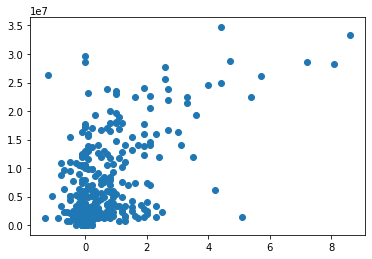

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain_pre['VORP'],ytrain)

# Modelo de regresión

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,SGDRegressor

steps = [('preproceso',nba_sal(cat_usr = cat_usr)), 
         ('regresion',LinearRegression())
         ]
metodo_full = Pipeline(steps=steps)
metodo_full

metodo_full.fit(Xtrain,ytrain) #entrena todos los pasos

Pipeline(memory=None,
         steps=[('preproceso',
                 nba_sal(cat_usr={'NBA_Country': ['USA', 'Canada', 'France',
                                                  'Australia', 'Spain',
                                                  'Croatia', 'Germany',
                                                  'Brazil', 'Serbia', 'Turkey',
                                                  'Lithuania', 'Cameroon',
                                                  'Montenegro', 'Italy',
                                                  'Switzerland', 'Latvia',
                                                  'Greece', 'United Kingdo...',
                                                  'Democratic Re...', 'Ukraine',
                                                  'Argentina', 'Puerto Rico',
                                                  'Dominican Rep...', 'Finland',
                                                  'Democrati...osnia',
                                

In [ ]:
ytest_e = metodo_full.predict(Xtest)
#metodo_full[1].coef_

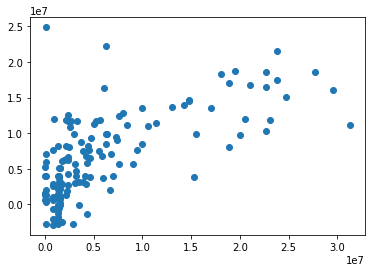

In [ ]:
#plt.plot(ytest_num,label='original')
#plt.plot(ytest_e,'r',label='estimado')
plt.scatter(ytest,ytest_e)

#plt.legend()

# Ventaneo

In [ ]:
#funcion ventaneo
def covid_win(serie,w=5):
    pi =0
    pf = w
    X = serie[pi:pf].reshape(1,-1)
    y = serie[pf].reshape(1,-1)
    pi += 1
    pf+= 1
    while pf+1 < serie.shape[0]:
      X = np.append(X,serie[pi:pf].reshape(1,-1),axis=0)
      y = np.append(y,serie[pf].reshape(1,-1),axis=0)
      pi += 1
      pf+=1
    return X, y # X \in Real^{N x P = w}, y \in Real^N


ii = Xd[Xd.columns[1]] == 'Colombia'
#print(np.where(ii)[0][0])
#contagios  acumulados
serie = np.array(Xd.iloc[np.where(ii)[0][0],4:])
#numero contagiados por dia
serie_d = np.append(0,np.diff(serie))
#serie_d = np.append(0,np.cumsum(np.diff(serie)))
w = 5
X,y = covid_win(serie,w=w)
X_d,y_d = covid_win(serie_d,w=w)

plt.plot(serie,'r')
plt.plot(y,'b')
plt.show()
plt.plot(y_d,'g')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

red = TSNE(n_components = 2,perplexity=10)
red_d = TSNE(n_components = 2,perplexity=10)

#red = PCA()
#red_d = PCA()


z = red.fit_transform(X)
z_d = red_d.fit_transform(X_d)

plt.scatter(z[:,0],z[:,1],c=y)
plt.colorbar()
plt.show()


plt.scatter(z_d[:,0],z_d[:,1],c=y_d)
plt.colorbar()
plt.show()